# ML_Clasificación

1. [Análisis exploratorio de los datos y preprocesamiento](#1-análisis-exploratorio-de-los-datos-y-preprocesamiento)

2. [Algoritmo de Machine Learning (RL, Clasificación, Clustering)](#2-algoritmo-de-machine-learning-clasificación)
 - 2.1. [Regresión logística](#21-regresión-logística)
 - 2.2. [Árboles de decisión](#22-árboles-de-decisión)
 - 2.3. [Random forest](#23-random-forest)

3. [Conclusiones](#3-conclusiones)

In [1]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from src import soporte_ajuste_logistica as sal
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# 1. Análisis exploratorio de los datos y preprocesamiento

In [2]:
# Cargamos el conjunto de datos y mostrar las primeras filas
df = pd.read_csv('Datos/Cardiovascular_Disease_Dataset.csv')
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


<img src="images/Var.png" alt="Variables" width="430" height="500">

In [3]:
# Tamaño del df
print(f'El número de columnas es {df.shape[1]} y el número de filas es {df.shape[0]}')

El número de columnas es 14 y el número de filas es 1000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


<div style="background-color: grey; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
No se observan valores nulos.

In [5]:
# Valores nulos en el df:
df.isna().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

<div style="background-color: grey; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
Al no contener valores nulos, no necesitamos aplicar técnicas de imputación o eliminación de filas.

In [6]:
# Valores duplicados
print(f'En el df tenemos {df.duplicated().sum()} valores duplicados')

En el df tenemos 0 valores duplicados


<div style="background-color: grey; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
Al no haber duplicados, nos ahorramos el paso de eliminarlos.

In [7]:
# Principales estadísticas de las variables numéricas 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patientid,1000.0,5.048704e+06,2.895905e+06,103368.0,2536439.50,4952508.5,7681877.00,9990855.0
age,1000.0,4.924200e+01,1.786473e+01,20.0,34.00,49.0,64.25,80.0
gender,1000.0,7.650000e-01,4.242110e-01,0.0,1.00,1.0,1.00,1.0
chestpain,1000.0,9.800000e-01,9.531571e-01,0.0,0.00,1.0,2.00,3.0
restingBP,1000.0,1.517470e+02,2.996523e+01,94.0,129.00,147.0,181.00,200.0
serumcholestrol,1000.0,3.114470e+02,1.324438e+02,0.0,235.75,318.0,404.25,602.0
fastingbloodsugar,1000.0,2.960000e-01,4.567194e-01,0.0,0.00,0.0,1.00,1.0
restingrelectro,1000.0,7.480000e-01,7.701228e-01,0.0,0.00,1.0,1.00,2.0
maxheartrate,1000.0,1.454770e+02,3.419027e+01,71.0,119.75,146.0,175.00,202.0
exerciseangia,1000.0,4.980000e-01,5.002462e-01,0.0,0.00,0.0,1.00,1.0


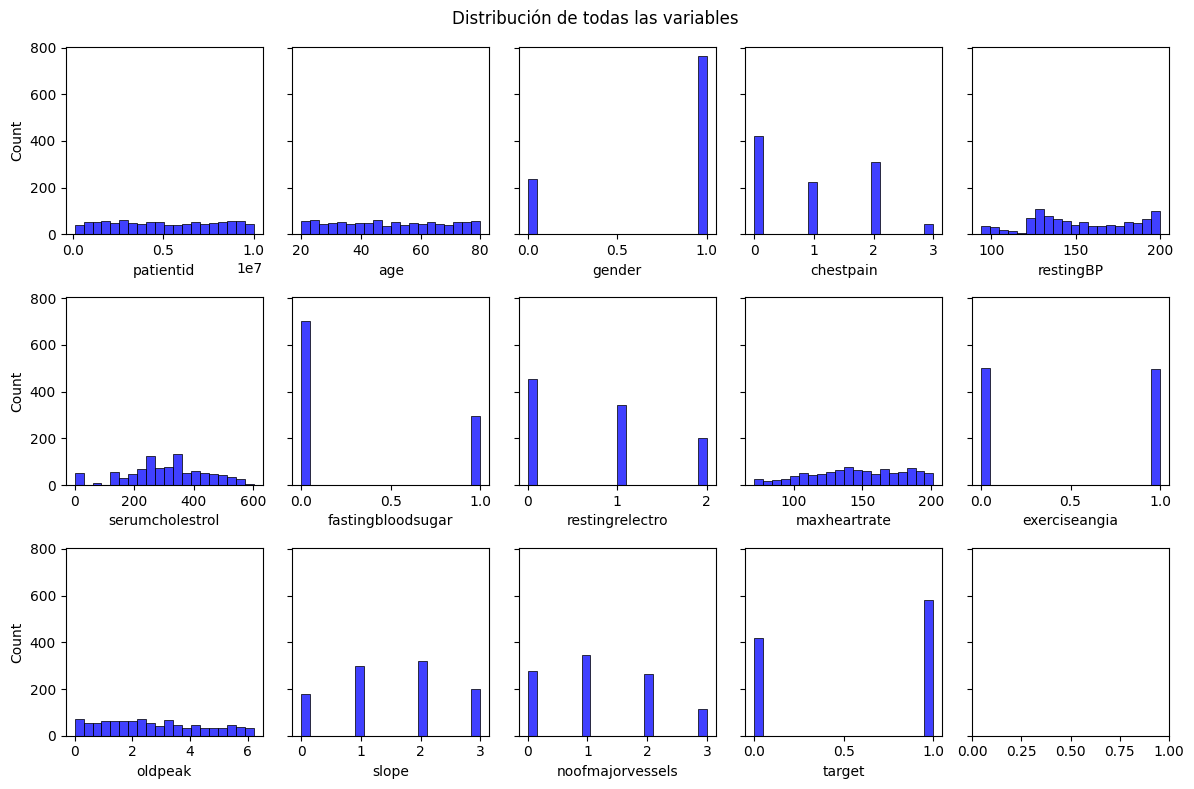

In [8]:
# Distribución de todas las variables
color = 'blue' 
tamano_grafica = (12, 8)  
lista_num = df.select_dtypes(include=['number']).columns

# Crear los subgráficos (axes)
fig, axes = plt.subplots(nrows=3, 
                         ncols=math.ceil(len(lista_num) / 3), 
                         figsize=tamano_grafica, 
                         sharey=True)

axes = axes.flat  # Convertir 'axes' en un arreglo unidimensional para iterar

# Graficar los histogramas
for indice, columna in enumerate(lista_num):
    sns.histplot(x=columna, data=df, ax=axes[indice], color=color, bins=20)

# Título de la figura
plt.suptitle("Distribución de todas las variables")

# Ajustar el diseño para que no se sobrepongan los elementos
plt.tight_layout()
plt.show()

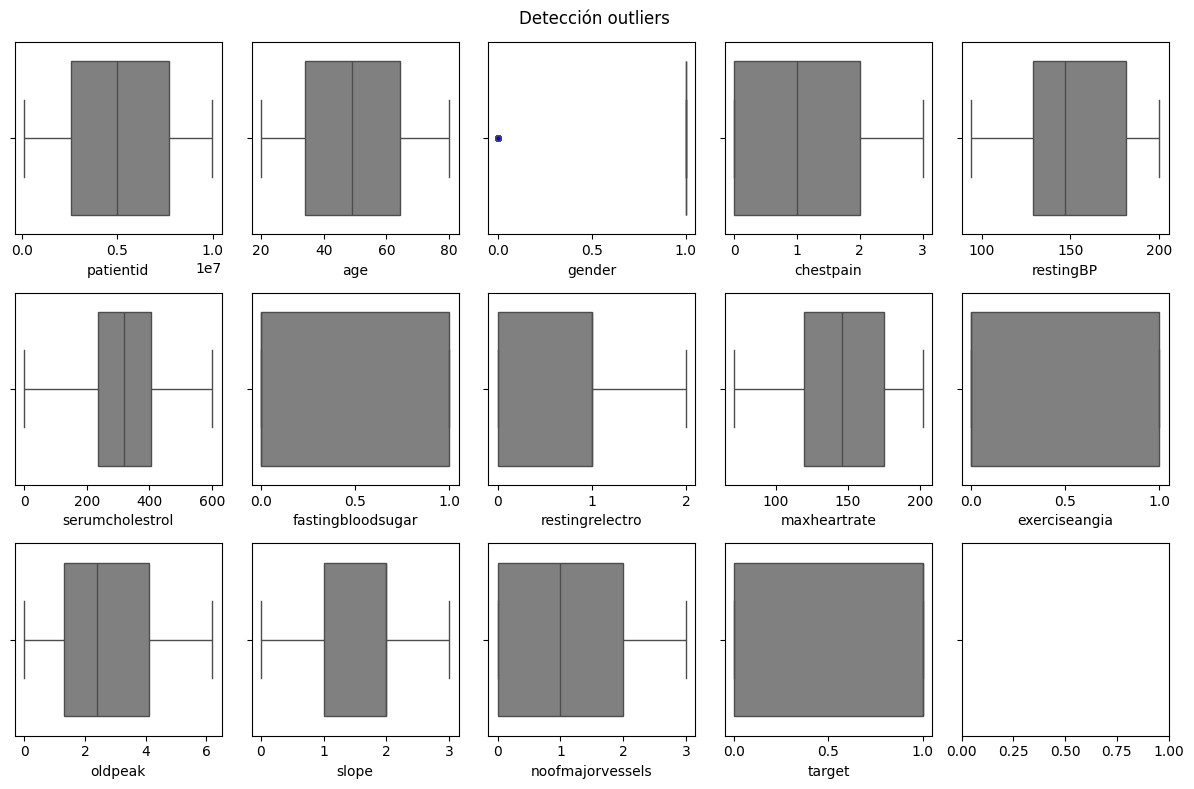

In [9]:
# Detección de outliers

lista_num = df.select_dtypes(include=['number']).columns

# Crear los subgráficos (axes)
fig, axes = plt.subplots(nrows=3, 
                         ncols=math.ceil(len(lista_num) / 3), 
                         figsize=(12, 8), 
                         sharey=True)

axes = axes.flat  # Convertir 'axes' en un arreglo unidimensional para iterar

# Graficar los histogramas
for indice, columna in enumerate(lista_num):
    sns.boxplot(x=columna, 
                data=df, 
                ax=axes[indice], 
                color='grey', 
                flierprops={'markersize': 4, 'markerfacecolor': 'blue'})

# Título de la figura
plt.suptitle("Detección outliers")

# Ajustar el diseño para que no se sobrepongan los elementos
plt.tight_layout()
plt.show()

<div style="background-color: grey; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
El dataset no contiene valores extremos que se desvíen significativamente de la mayoría de los datos. 

In [10]:
diccionario_resultados_z = {}

for columna in df.select_dtypes(include=np.number).columns:
    z_scores = abs(zscore(df[columna]))
    diccionario_resultados_z[columna] = df[z_scores > 3]
    print(f"La cantidad de outliers que tenemos para la columna {columna.upper()} es ", 
         f"{diccionario_resultados_z[columna].shape[0]}")

La cantidad de outliers que tenemos para la columna PATIENTID es  0
La cantidad de outliers que tenemos para la columna AGE es  0
La cantidad de outliers que tenemos para la columna GENDER es  0
La cantidad de outliers que tenemos para la columna CHESTPAIN es  0
La cantidad de outliers que tenemos para la columna RESTINGBP es  0
La cantidad de outliers que tenemos para la columna SERUMCHOLESTROL es  0
La cantidad de outliers que tenemos para la columna FASTINGBLOODSUGAR es  0
La cantidad de outliers que tenemos para la columna RESTINGRELECTRO es  0
La cantidad de outliers que tenemos para la columna MAXHEARTRATE es  0
La cantidad de outliers que tenemos para la columna EXERCISEANGIA es  0
La cantidad de outliers que tenemos para la columna OLDPEAK es  0
La cantidad de outliers que tenemos para la columna SLOPE es  0
La cantidad de outliers que tenemos para la columna NOOFMAJORVESSELS es  0
La cantidad de outliers que tenemos para la columna TARGET es  0


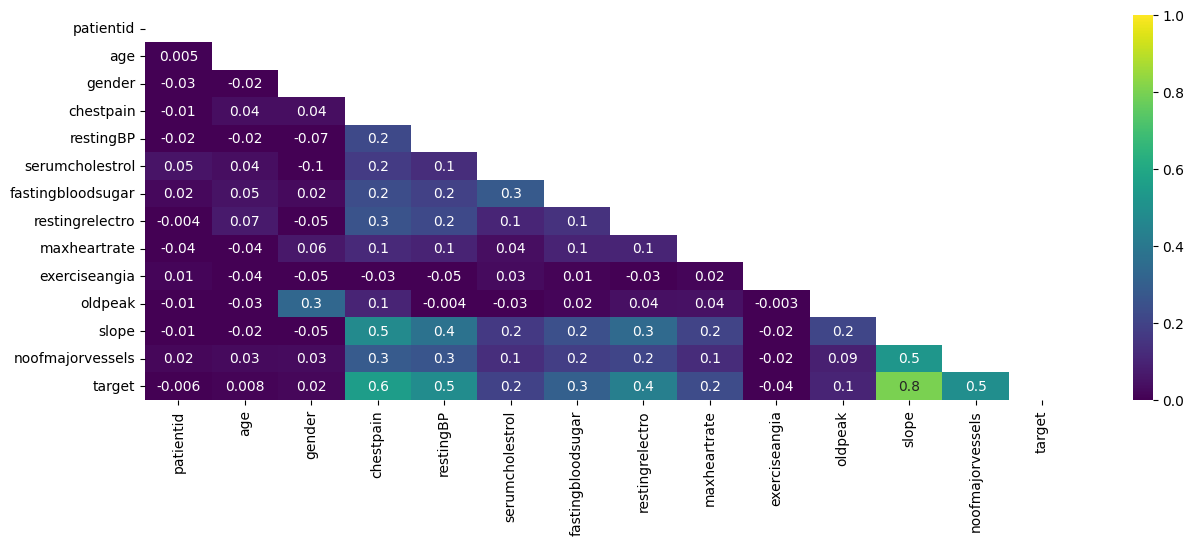

In [11]:
# Correlación de variables
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype = np.bool_))

plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),
            annot = True, 
            vmin=0,
            vmax=1,
            cmap="viridis",
            linecolor="black", 
            fmt='.1g',
            mask=mask);

<div style="background-color: grey; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
<h5>Interpretación de la matriz de correlación:</h5>

- La variable **target** parece tener las correlaciones más altas con **slope (0.8)**, **chestpain (0.6)**, **restingBP (0.5)** y **noofmajorvessels (0.5)**. Al ser significativas, las podemos catalogar como buenas predictoras para el modelo.

- Por otro lado, dado que la variable **patientid** es un identificador único, podemos elminarla del análisis.

In [12]:
# Eliminamos la columna 'patientid' del df
df = df.drop(columns=['patientid'])
df.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


<div style="background-color: grey; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
<h5>Transformación de variables:</h5>

- **Sin transformar**: no aplicaremos transformación a las variables binarias: 'gender', 'fastingbloodsugar' y 'exerciseangia'.
- **One-Hot-Encoding**: al tratarse de variables categóricas, utilizamos este método para las variables 'noofmajorvessels', 'chestpain', 'slope' y 'restingrelectro'.
- **MinMaxScaler**: para variables continuas, aplicamos este método. Dichas variables son: 'age', 'restingBP', 'serumcholestrol', 'maxheartrate' y 'oldpeak'.

One-Hot-Encoding

In [13]:
# Definimos las variables
variables_ohe = ['noofmajorvessels', 'chestpain', 'slope', 'restingrelectro']

In [ ]:
# Creamos una instancia de OneHotEncoder, drop='first' elimina la multicolinealidad
encoder = OneHotEncoder(sparse_output=False, drop='first')

In [15]:
# Aplicamos el encoder
encoded_data = encoder.fit_transform(df[variables_ohe])

In [16]:
# Creamos un df con los nuevos valores codificados
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(variables_ohe), index=df.index)

In [17]:
# Concatenamos el df codificado con el resto de variables
df = pd.concat([df.drop(columns=variables_ohe), encoded_df], axis=1)
df.sample(5)

,age,gender,restingBP,serumcholestrol,fastingbloodsugar,maxheartrate,exerciseangia,oldpeak,target,noofmajorvessels_1,noofmajorvessels_2,noofmajorvessels_3,chestpain_1,chestpain_2,chestpain_3,slope_1,slope_2,slope_3,restingrelectro_1,restingrelectro_2
479,73,0,183,517,1,99,0,1.4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
398,32,1,139,316,0,108,1,3.5,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
81,37,1,145,257,1,126,0,4.7,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
155,66,1,108,278,0,168,0,4.9,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
748,78,1,155,431,1,137,0,0.9,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Min Max Scaler

In [18]:
# Definimos las variables 
variables_minmax = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']

In [19]:
# Creamos una instancia del MinMaxScaler
scaler = MinMaxScaler()

In [20]:
# Aplicar el escalado a las columnas seleccionadas
df[variables_minmax] = scaler.fit_transform(df[variables_minmax])
df.head()

,age,gender,restingBP,serumcholestrol,fastingbloodsugar,maxheartrate,exerciseangia,oldpeak,target,noofmajorvessels_1,noofmajorvessels_2,noofmajorvessels_3,chestpain_1,chestpain_2,chestpain_3,slope_1,slope_2,slope_3,restingrelectro_1,restingrelectro_2
0,0.550000,1,0.726415,0.000000,0,0.580153,0,0.854839,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.333333,1,0.000000,0.380399,0,0.335878,0,0.596774,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.483333,1,0.367925,0.235880,0,1.000000,1,0.806452,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.383333,1,0.415094,0.490033,1,0.625954,0,0.516129,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.183333,1,0.990566,0.000000,0,0.496183,0,0.854839,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [21]:
# Movemos 'target' al final del df
target_column = df.pop('target')
df['target'] = target_column

In [22]:
df.head()

,age,gender,restingBP,serumcholestrol,fastingbloodsugar,maxheartrate,exerciseangia,oldpeak,noofmajorvessels_1,noofmajorvessels_2,noofmajorvessels_3,chestpain_1,chestpain_2,chestpain_3,slope_1,slope_2,slope_3,restingrelectro_1,restingrelectro_2,target
0,0.550000,1,0.726415,0.000000,0,0.580153,0,0.854839,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1
1,0.333333,1,0.000000,0.380399,0,0.335878,0,0.596774,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
2,0.483333,1,0.367925,0.235880,0,1.000000,1,0.806452,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,0.383333,1,0.415094,0.490033,1,0.625954,0,0.516129,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4,0.183333,1,0.990566,0.000000,0,0.496183,0,0.854839,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1


# 2. Algoritmo de Machine Learning (Clasificación)

## 2.1. Regresión Logística

In [23]:
# Creamos una instancia de la clase de análisis del modelo de clasificación
logistica = sal.AnalisisModelosClasificacion(dataframe=df, variable_dependiente='target')

In [24]:
# Llamamos al método para realizar el ajuste del modelo de regresión logística:
logistica.ajustar_modelo_logistic_regression()

In [25]:
# Llamamos al método para obtener los resultados de las predicciones y mostramos los resultados:
df_resultados = logistica.obtener_resultados('logistic_regression')
df_resultados.head()

,Real,Predicho,Conjunto,Modelo
29,1,1,Train,Regresión Logística
535,0,0,Train,Regresión Logística
695,1,1,Train,Regresión Logística
557,0,0,Train,Regresión Logística
836,1,1,Train,Regresión Logística


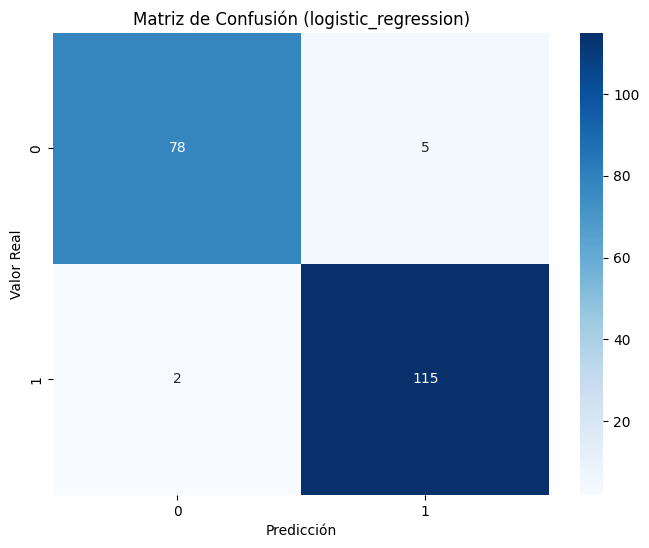

In [26]:
# Mostramos la matriz de confusión
logistica.plot_matriz_confusion('logistic_regression')

<div style="background-color: grey; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
<h5>Interpretación de la matriz de confusión:</h5>

- **Verdaderos Negativos (TN)** (Predicciones correctas de la clase 0): El valor de **78** situado en la parte superior izquierda indica que el modelo predijo correctamente 78 instancias.

- **Falsos Positivos (FP)** (Predicciones incorrectas de la clase 0): El valor **5** de la celda superior derecha muestra que el modelo predijo incorrectamente 5 instancias que pertenecía a la clase 1 cuando en realizada eran de la clase 0.

- **Falsos Negativos (FN)** (Predicciones incorrectas de la clase 1): el valor **2** en la celda inferior izquierda indica que el modelo predijo incorrectamente que 2 instancias pertenecían a la clase 0 cuando en realidad eran de la clase 1.

- **Verdaderos Positivos (TP)** (Predicciones correctas de la clase 1): el valor **115** en la celda inferior derecha indica que el modelo predijo correctamente que 115 instancias pertenecían a la clase 1.

In [27]:
# Cálculo de las métricas del modelo:
logistica.calcular_metricas('logistic_regression')

,train,test
accuracy,0.972500,0.965000
precision,0.972534,0.965250
recall,0.972500,0.965000
f1_score,0.972511,0.964899


<div style="background-color: grey; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
<h5>Interpretación de las métricas:</h5>

- **`Accuracy` (Precisión global)**: El modelo está haciendo predicciones correctas en más del 97% de los casos en el conjunto de entrenamiento y del 96.5% en el conjunto de prueba. Esto sugiere que el modelo tiene un buen desempeño en general, pero el desempeño en el conjunto de prueba es ligeramente inferior al del conjunto de entrenamiento, lo cual es esperado debido al sobreajuste que puede ocurrir cuando el modelo se ajusta demasiado a los datos de entrenamiento.

- **`Precision`**: Esto significa que, de todas las veces que el modelo predijo que una observación pertenecía a la clase positiva, el 97.3% en el entrenamiento y el 96.5% en el conjunto de prueba estaban correctos. Esta precisión tan alta sugiere que el modelo está haciendo pocas predicciones erróneas cuando dice que una instancia pertenece a la clase positiva.

- **`Recall` (Sensibilidad)**: El modelo tiene una tasa de recall muy alta (97.3% en el entrenamiento), lo que significa que identifica correctamente casi todas las observaciones positivas, tanto en el conjunto de entrenamiento como en el de prueba. Esto es especialmente importante en este conjunto de datos para detectar todos los casos positivos, aunque algunos diagnósticos sean falsos.

- **`F1 Score`**: El F1 score refleja un balance entre precisión y recall. Un F1 score cercano a 1 indica que el modelo tiene un buen equilibrio entre ambas métricas. En este caso, el F1 score es muy alto tanto en entrenamiento (97.2%) como en prueba (96.5%), lo que indica que el modelo está equilibrado en términos de precisión y recall. Este dato también es muy importante en este conjunto de datos, donde tanto los falsos positivos como los falsos negativos tienen un costo significativo.

</div>

Importancia de los predictores en el modelo Regresión Logística
-------------------------------------------
             predictor  importancia
16             slope_3     9.161595
15             slope_2     7.607974
7              oldpeak     4.209790
2            restingBP     3.173368
14             slope_1     2.415152
18   restingrelectro_2     1.780913
1               gender     1.777130
12         chestpain_2     1.648228
9   noofmajorvessels_2     1.141908
13         chestpain_3     1.090846
11         chestpain_1     0.805315
4    fastingbloodsugar     0.710532
5         maxheartrate     0.468731
17   restingrelectro_1     0.166169
3      serumcholestrol     0.112646
8   noofmajorvessels_1     0.089604
10  noofmajorvessels_3     0.000000
6        exerciseangia     0.000000
0                  age     0.000000


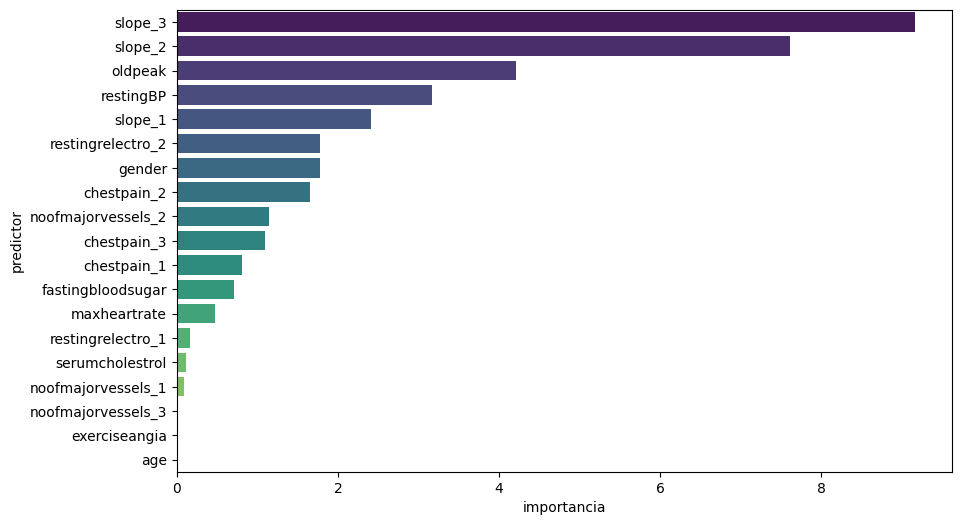

In [28]:
# Mostramos la importacia de los predictores en el modelo de regresión logística:
logistica.importancia_predictores('logistic_regression')

<div style="background-color: grey; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
<h5>Interpretación de la gráfica:</h5>

1. Predictores más importantes:
- **slope_3 (9.16) y slope_2 (7.61)**
Ambas son las categorías codificadas de la variables *slope*, que reflejan la pendiente del segmento ST en el electrocardiograma. Su importancia indica que el comportamiento de esta variable está fuertemente relacionado con el riesgo cardiovascular.

- **oldpeak (4.21)**
Este valor representa la depresión del ST durante el esfuerzo físico. Cuanto más alto sea este valor, mayor es el riesgo de enfermedad cardiovascular, y el modelo lo considera altamente relevante.

- **restingBP (3.17)**
La presión arterial en reposo también tiene un impacto significativo en la predicción. Este resultado es consistente con estudios clínicos que destacan la presión arterial alta como un factor de riesgo clave.

2. Predictores con impacto significativo:
- **slope_1 (2.42), restingrelectro_2 (1.78), y chestpain_2 (1.65)**
Estas categorías indican que también están directamente relacionadas con el riesgo cardiovascular.

- **gender (1.78)**
Dicha variable también tiene cierta relevancia, sugiriendo que el género influye en el riesgo.

</div>

Por último, llevamos a cabo un par de métodos de validación cruzada:

In [29]:
# K-Fold Cross-Validation para el modelo de regresión:
logistica.cross_validate_kfold(modelo="logistic_regression", cv=5)

K-Fold Cross-Validation Scores para un modelo de logistic_regression es:
Mean Score: 0.96


In [30]:
# Stratified K-Fold Cross-Validation para el modelo de regresión:
logistica.cross_validate_stratified_kfold(modelo="logistic_regression", cv=5)

Stratified K-Fold Cross-Validation Scores para un modelo de logistic_regression es:
Mean Score: 0.96


<div style="background-color: grey; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
<h5>Interpretación de los resultados:</h5>

Los resultados obtenidos de la validación cruzada para el modelo de **regresión logística** indican lo siguiente:

- **K-Fold Cross-Validation Score** (Puntuación Media: 0.96): Este resultado muestra que, tras aplicar el proceso de validación cruzada estándar (K-Fold), el modelo de regresión logística tiene una precisión promedio del 96%. Es decir, en las diferentes particiones de los datos, el modelo es capaz de predecir correctamente el 96% de los casos.
   
- **Stratified K-Fold Cross-Validation Score** (Puntuación Media: 0.96): En el caso de la validación cruzada estratificada (Stratified K-Fold), que asegura que la proporción de clases en cada pliegue sea representativa del conjunto de datos original, el modelo también ha logrado una precisión promedio del 96%.

Dado que ambos enfoques proporcionan la misma puntuación media, es probable que los datos estén bien balanceados en términos de clases, lo que explica por qué la estratificación no cambia el resultado.

</div>

## 2.2. Árboles de decisión

In [31]:
# Instanciamos la clase de análisis de modelos de clasificación
clasificacion = sal.AnalisisModelosClasificacion(df, 'target')

In [32]:
# Definimos los hiperparámetros del árbol:
params_arbol = {
            'max_depth': [3, 5, 7, 10],
            'min_samples_split': [10,50,100, 200],
            'min_samples_leaf': [10,50,100, 200],
            'max_leaf_nodes': [4,6,8,10, 20, 30]
        }

In [33]:
# Llamamos a la función
clasificacion.ajustar_modelo_tree(params_arbol)

In [34]:
# Llamamos al método para obtener los resultados de las predicciones y los mostramos:
df_resultados_arbol = clasificacion.obtener_resultados('tree')
df_resultados_arbol.head()

,Real,Predicho,Conjunto,Modelo
29,1,1,Train,Árbol de Decisión
535,0,0,Train,Árbol de Decisión
695,1,1,Train,Árbol de Decisión
557,0,0,Train,Árbol de Decisión
836,1,1,Train,Árbol de Decisión


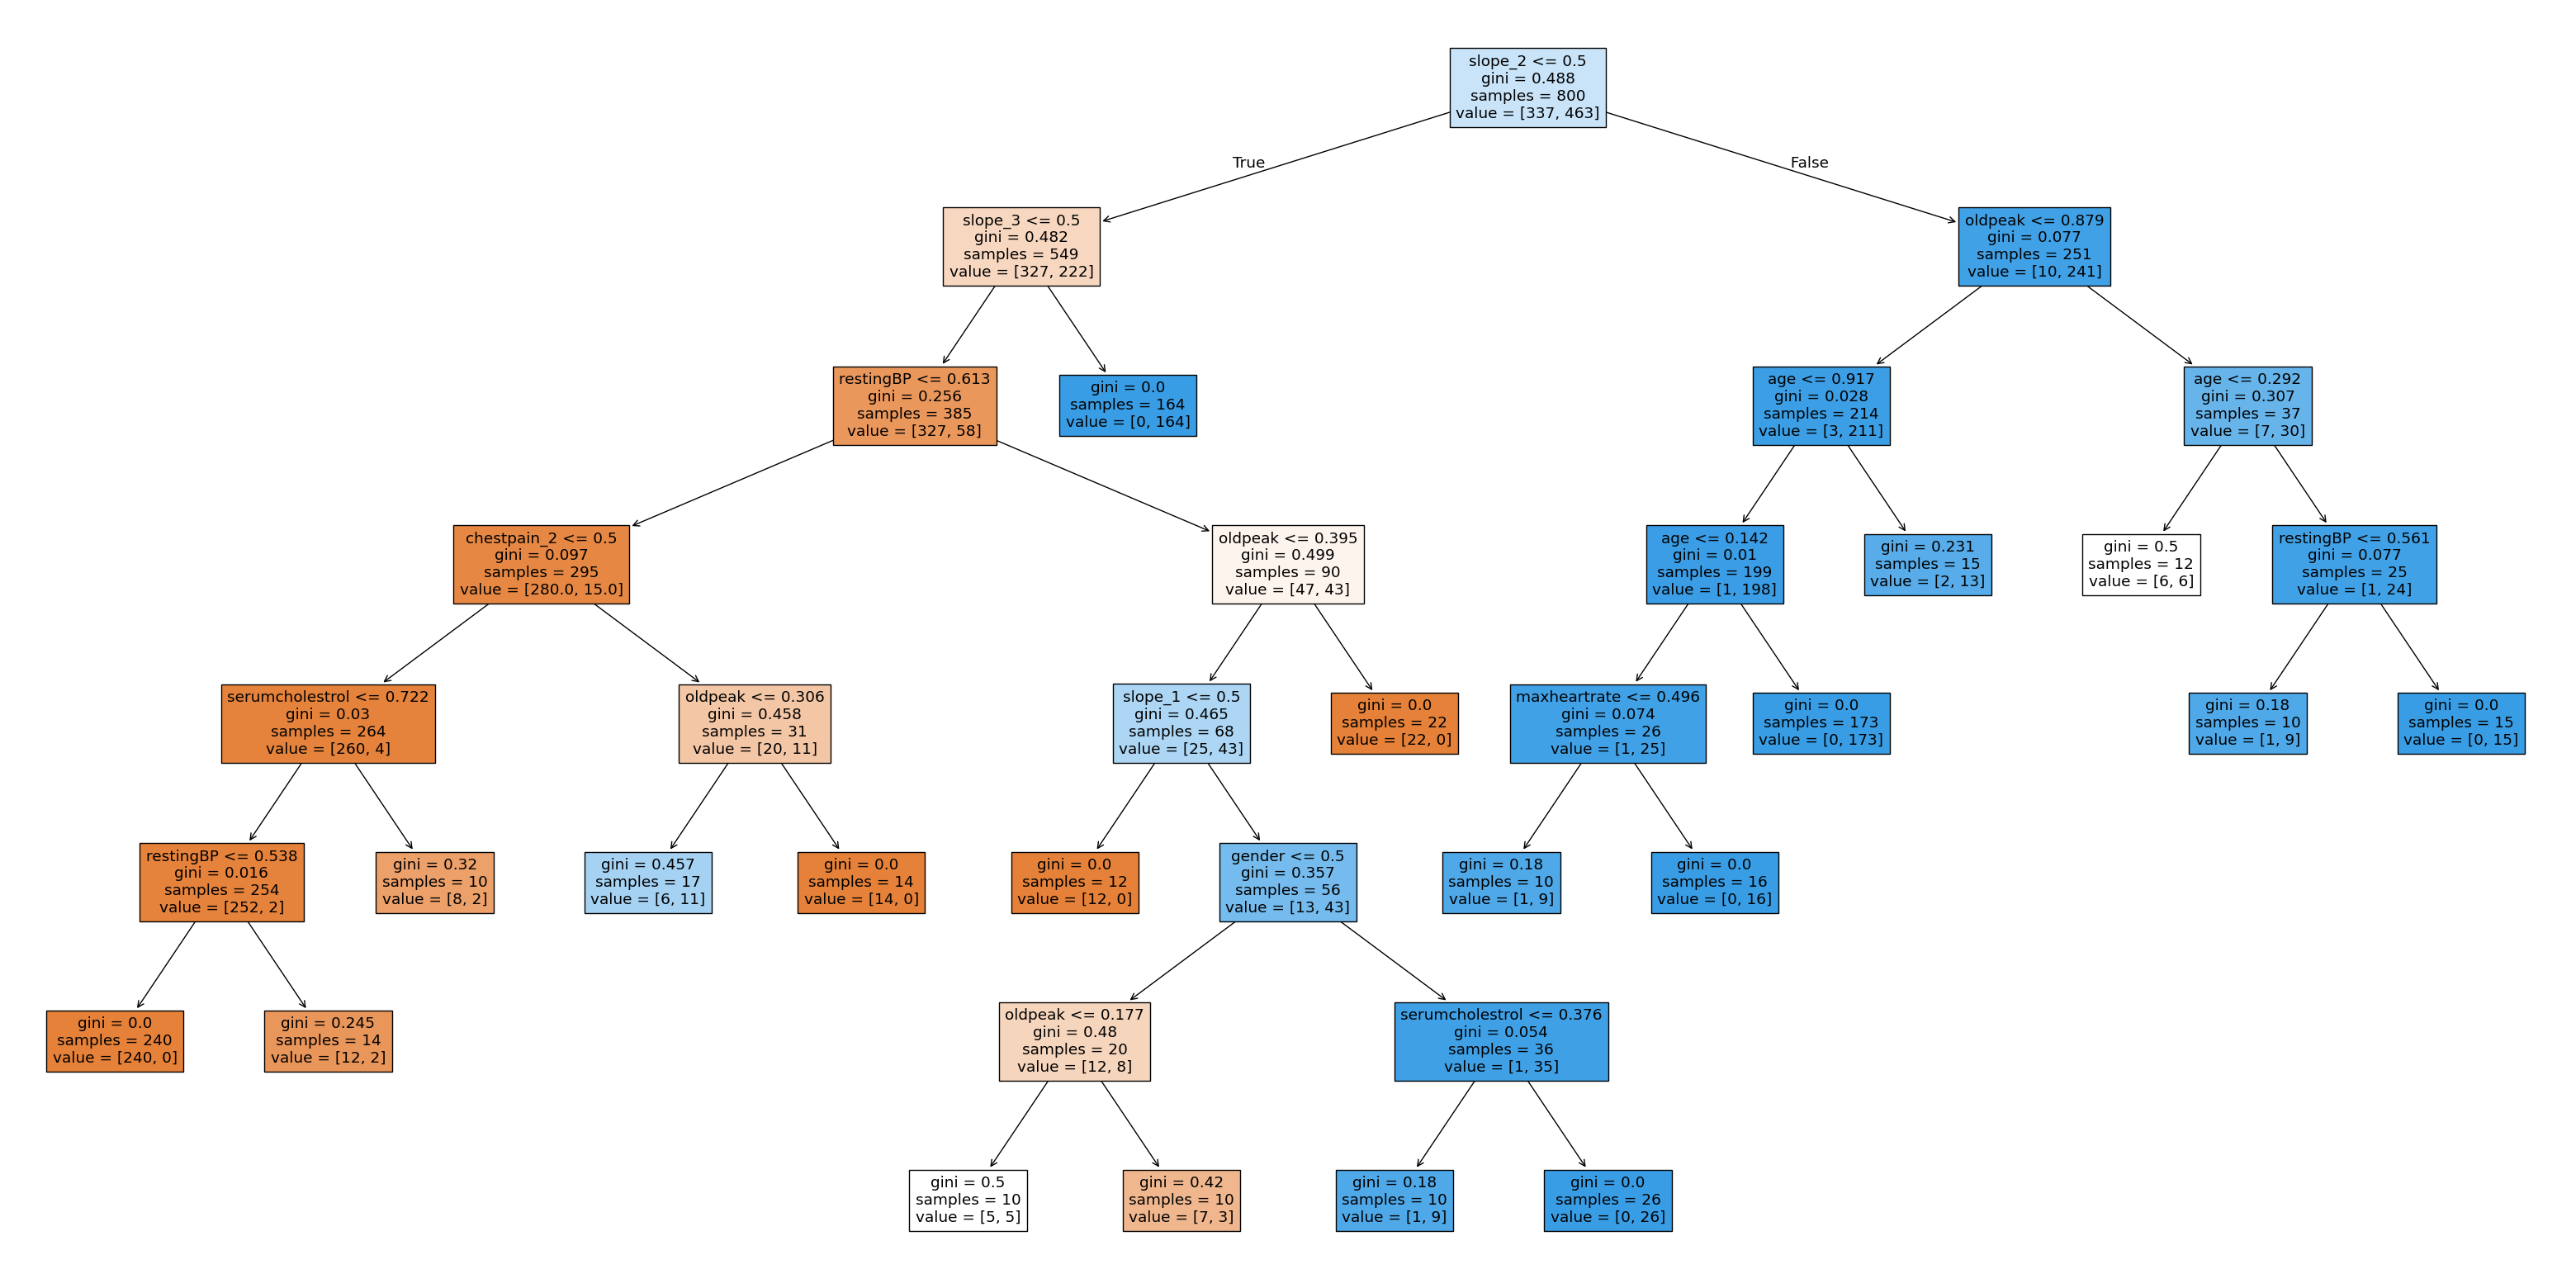

In [35]:
# Mostramos el árbol de decisión:
clasificacion.plot_arbol_decision()

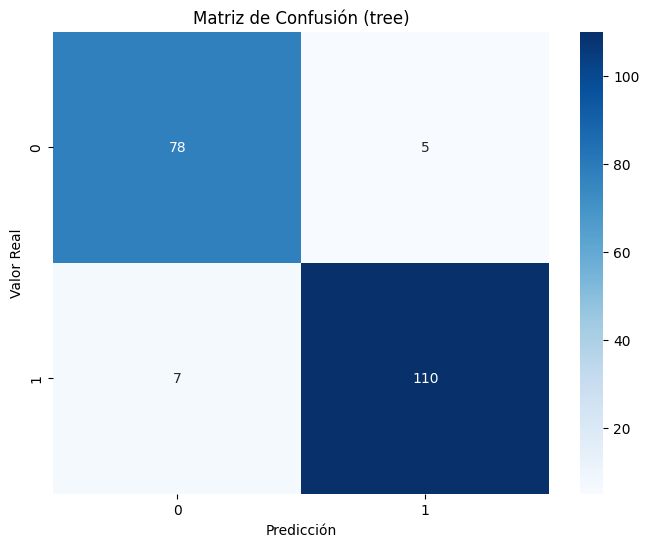

In [36]:
# Mostramos la matriz de confusión
clasificacion.plot_matriz_confusion('tree')

<div style="background-color: grey; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
<h5>Interpretación de la matriz de confusión:</h5>

La matriz de confusión nos muestra que:

- **Verdaderos negativos (TN)**: **78** casos donde el modelo predijo correctamente la clase "0" (negativa). Esto indica que el modelo identificó correctamente estas observaciones como "negativas".

- **Falsos positivos (FP)**: **5** casos donde el modelo predijo "1" (positiva), pero en realidad eran "0" (negativa).  Estos son los falsos positivos, es decir, los casos que el modelo predijo incorrectamente como "positivos". Este bajo número de falsos positivos, lo que indica que rara vez clasifica incorrectamente algo como positivo cuando en realidad es negativo.

- **Falsos negativos (FN)**: **7** casos donde el modelo predijo "0" (negativa), pero en realidad eran "1" (positiva). Estos son los falsos negativos, es decir, el modelo falló al identificar estos casos como positivos.

- **Verdaderos positivos (TP)**: **110** casos donde el modelo predijo correctamente la clase "1" (positiva). El modelo identificó correctamente estas observaciones como "positivas".


</div>

In [37]:
# Mostramos métricas del modelo:
clasificacion.calcular_metricas('tree')

,train,test
accuracy,0.963750,0.940000
precision,0.963997,0.940389
recall,0.963750,0.940000
f1_score,0.963798,0.940099


Importancia de los predictores en el modelo Árbol de Decisión
-------------------------------------------
             predictor  importancia
16             slope_3     0.471917
15             slope_2     0.302645
2            restingBP     0.073372
7              oldpeak     0.062734
14             slope_1     0.033142
1               gender     0.023946
12         chestpain_2     0.018208
0                  age     0.011255
3      serumcholestrol     0.002431
5         maxheartrate     0.000350
17   restingrelectro_1     0.000000
13         chestpain_3     0.000000
9   noofmajorvessels_2     0.000000
11         chestpain_1     0.000000
10  noofmajorvessels_3     0.000000
8   noofmajorvessels_1     0.000000
6        exerciseangia     0.000000
4    fastingbloodsugar     0.000000
18   restingrelectro_2     0.000000


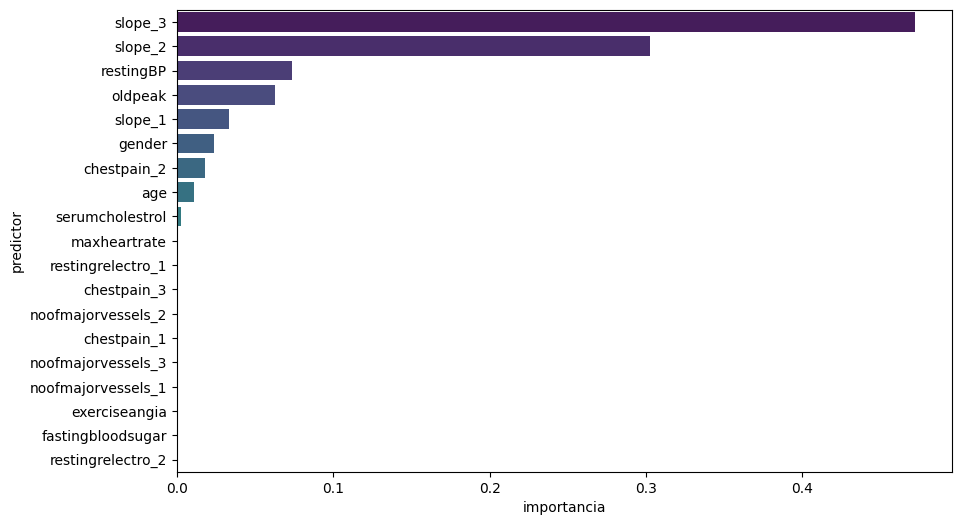

In [38]:
# Evaluamos la importancia de las variables predictoras
clasificacion.importancia_predictores('tree')

<div style="background-color: grey; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
<h4>Interpretación de la gráfica:</h4>

<br> **Principales predictores:** </br>
**slope_3 (0.47) y slope_2 (0.30)**: Estas categorías dominan claramente el modelo, contribuyendo con más del 77% de la importancia total. Esto significa que el modelo se apoya principalmente en estas variables, lo que las hace críticas para la predicción.

<br> **Predictores con importancia moderada:** </br>
 **restingBP (0.07)**: La presión arterial en reposo es el siguiente predictor más importante. Aunque su importancia es mucho menor que la de slope, sigue siendo relevante en la segmentación de los datos.

 **oldpeak (0.06)**: Lo mismo sucede con la depresión del ST durante el esfuerzo físico.

</div>

In [39]:
# K-Fold Cross-Validation para el modelo de regresión
clasificacion.cross_validate_kfold('tree', cv=5)

K-Fold Cross-Validation Scores para un modelo de tree es:
Mean Score: 0.95


In [40]:
# Stratified K-Fold Cross-Validation para el modelo de regresión
clasificacion.cross_validate_stratified_kfold('tree', cv=5, scoring = "accuracy")

Stratified K-Fold Cross-Validation Scores para un modelo de tree es:
Mean Score: 0.95


<div style="background-color: grey; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
<h5>Interpretación de los resultados:</h5>

Los resultados obtenidos de la validación cruzada para el modelo de **árboles de decisión** indican lo siguiente:

- **K-Fold Cross-Validation Score** (Puntuación Media: 0.95): Este resultado muestra que, tras aplicar el proceso de validación cruzada estándar (K-Fold), el modelo de regresión logística tiene una precisión promedio del 95%. Es decir, en las diferentes particiones de los datos, el modelo es capaz de predecir correctamente el 95% de los casos.
   
- **Stratified K-Fold Cross-Validation Score** (Puntuación Media: 0.95): En el caso de la validación cruzada estratificada (Stratified K-Fold), que asegura que la proporción de clases en cada pliegue sea representativa del conjunto de datos original, el modelo también ha logrado una precisión promedio del 95%.

Ambos métodos dan la misma puntuación, lo que es probable que los datos estén bien balanceados en términos de clases, explicando por qué la estratificación no cambia el resultado.

</div>

## 2.3. Random Forest

In [41]:
# Definimos los hiperparámetros de los árboles:
params_forest = {
            'max_depth': [3, 5, 7, 10],
            'min_samples_split': [10,50,100, 200],
            'min_samples_leaf': [10,50,100, 200],
            'max_leaf_nodes': [4,6,8,10, 20, 30]
        }

In [42]:
# Llamamos a la función para ajustar el modelo:
clasificacion.ajustar_modelo_random_forest(params_forest)

In [43]:
# Llamamos al metodo para obtener los resultaods de las predicciones:
df_resultados_bosque = clasificacion.obtener_resultados('random_forest')
df_resultados_bosque.head()

,Real,Predicho,Conjunto,Modelo
29,1,1,Train,Random Forest
535,0,0,Train,Random Forest
695,1,1,Train,Random Forest
557,0,0,Train,Random Forest
836,1,1,Train,Random Forest


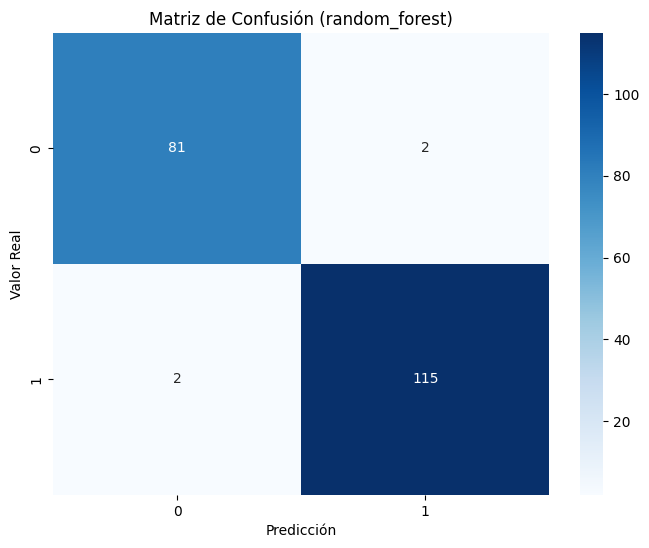

In [44]:
clasificacion.plot_matriz_confusion('random_forest')

<div style="background-color: grey; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
<h5>¿Cómo interpretamos esta gráfica?</h5>


- **Verdaderos Negativos (TN)** (`81`): El modelo predijo correctamente que **81** observaciones pertenecen a la clase `0` (negativa), lo que significa que estas predicciones fueron correctas.

- **Falsos Positivos (FP)** (`2`): El modelo predijo que **2** observaciones pertenecían a la clase `1` (positiva), cuando en realidad pertenecían a la clase `0`. Esto representa el error del modelo al clasificar incorrectamente instancias negativas como positivas.

- **Falsos Negativos (FN)** (`2`): El modelo predijo que **2** observaciones pertenecían a la clase `0` (negativa), cuando en realidad pertenecían a la clase `1`. Esto representa el error del modelo al clasificar incorrectamente instancias positivas como negativas.

- **Verdaderos Positivos (TP)** (`115`): El modelo predijo correctamente que **115** observaciones pertenecían a la clase `1` (positiva), lo que significa que estas predicciones fueron correctas.

</div>

In [45]:
# Llamamos al método para calcular las métricas del modelo:
clasificacion.calcular_metricas('random_forest')

,train,test
accuracy,0.968750,0.98
precision,0.968739,0.98
recall,0.968750,0.98
f1_score,0.968731,0.98


<div style="background-color: grey; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
Un F1-Score de 0.97 en el conjunto de prueba indica un equilibrio sólido entre precisión y recall, lo que hace que el modelo sea confiable tanto para identificar a los pacientes en riesgo como para minimizar los errores en ambas direcciones (falsos positivos y falsos negativos).

Importancia de los predictores en el modelo Random Forest
-------------------------------------------
             predictor  importancia
2            restingBP     0.211174
15             slope_2     0.205010
16             slope_3     0.166310
12         chestpain_2     0.102588
14             slope_1     0.062811
3      serumcholestrol     0.060435
9   noofmajorvessels_2     0.047434
18   restingrelectro_2     0.033874
5         maxheartrate     0.030879
7              oldpeak     0.020905
4    fastingbloodsugar     0.020095
1               gender     0.011871
11         chestpain_1     0.007121
10  noofmajorvessels_3     0.005424
0                  age     0.005171
8   noofmajorvessels_1     0.003155
17   restingrelectro_1     0.002532
13         chestpain_3     0.002161
6        exerciseangia     0.001050


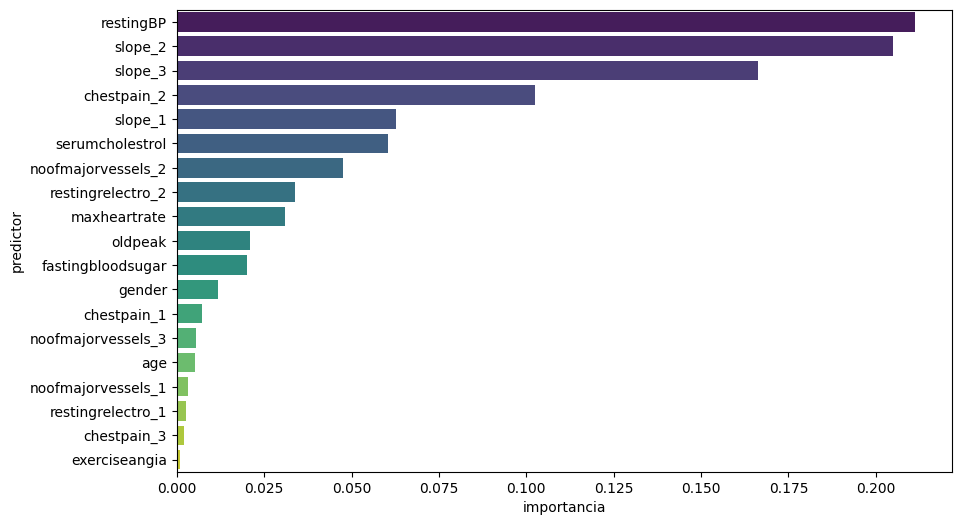

In [46]:
# Evaluamos la importancia de las variables predictoras/independientes:
clasificacion.importancia_predictores('random_forest')

<div style="background-color: grey; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
<h5>Interpretación de la gráfica:</h5>

<br> **Principales predictores:** </br>
**restingBP (0.21)**: La presión arterial en reposo es la variable más importante, representando más del 21% de la importancia total. Esto sugiere que esta variable tiene un papel clave en la clasificación y aporta mucha información para predecir el resultado.

**slope_2 (0.21) y slope_3 (0.17)**: Las categorías de la variable slope (pendiente del segmento ST en el ECG) también son extremadamente relevantes, contribuyendo con más del 38% combinado. Esto indica que las anomalías en la pendiente del segmento ST son indicadores importantes en la predicción de enfermedades cardiovasculares.

<br> **Predictores con importancia moderada:** </br>
 **chestpain_2 (0.10)**: El tipo de dolor de pecho (categoría 2), dolor no anginoso, tiene una importancia moderada, lo que sugiere que está relacionado con las diferencias en las clases objetivo.

 **slope_1 (0.063) y serumcholestrol (0.06)**: Aunque su importancia es más baja, estas variables todavía tiene un peso considerable. 
 
 **noofmajorvessels_2 (0.05), restingrelectro_2 (0.03) y maxheartrate (0.03)**: Estas variables tienen una importancia similar y, aunque no tan significativas como las principales, aportan información útil al modelo.

</div>

In [47]:
# K-Fold Cross-Validation para el random forest:
clasificacion.cross_validate_kfold('random_forest', cv=5)

K-Fold Cross-Validation Scores para un modelo de random_forest es:
Mean Score: 0.98


In [48]:
# Stratified K-Fold Cross-Validation para el random forest:
clasificacion.cross_validate_stratified_kfold('random_forest', cv=5, scoring = "accuracy")

Stratified K-Fold Cross-Validation Scores para un modelo de random_forest es:
Mean Score: 0.98


<div style="background-color: grey; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
<h5>Interpretación de los resultados:!</h5>

Los resultados obtenidos de la validación cruzada para el modelo de **Random Forest** indican lo siguiente:

- **K-Fold Cross-Validation Score** (Puntuación Media: 0.98): Este resultado muestra que el modelo de Random Forest tiene un rendimiento alto en términos de precisión. Una precisión media de 0.98 indica que el modelo predice correctamente el 98% de las veces en las diferentes divisiones de K-Fold, lo cual es un muy buen resultado.
   
- **Stratified K-Fold Cross-Validation Score** (Puntuación Media: 0.98): En el caso de la validación cruzada estratificada (Stratified K-Fold),  indica que el modelo está funcionando aún mejor cuando se asegura una distribución balanceada de la variable objetivo en cada partición.

Ambos muestran el mismo resultado, sugiriendo que el dataset es representativo, robusto y balanceado y que no necesita una estratificación específica, ya que los resultados serían equivalentes.

</div>

# 3. Conclusiones

<div style="background-color: grey; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
<h5>Conclusión</h5>

Basándonos en lo visto anteriormente:

- **Random Forest** es el modelo más robusto y ofrece el mejor rendimiento general. Tiene la precisión más alta, el menor número de errores en la matriz de confusión, y utiliza un conjunto equilibrado de predictores. Además, tiene menor riesgo de sobreajuste, ya que la diferencia entre el rendimiento en entrenamiento y prueba es pequeña.

- **Regresión Logística** también es un buen modelo, pero tiene una precisión ligeramente inferior y podría no capturar relaciones no lineales tan bien como el Random Forest.

- **Árboles de Decisión** tiene un buen rendimiento, pero la eliminación de muchos predictores puede limitar su capacidad de generalización.

<div style="background-color: grey; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
<h5>Uso práctico del modelo</h5>

El **principal objetivo** que tiene el modelo (en este caso el escogido es Random Forest) es predecir la probabilidad de que un paciente padezca una enfermedad cardiovascular, representada en este dataset en la variable *target*.

El **uso clínico** que le podemos dar es que al introducir las características del paciente en el modelo, se obtiene una predicción sobre la probabilidad de que el paciente sufra una enfermedad cardiovascular, ayudando a los médicos a evaluar el riesgo de manera rápida y eficiente.

Algunos factores, como slope, chestpain, y restingBP, tienen una fuerte correlación con la presencia de enfermedad cardiovascular. Valores altos en estos predictores incrementan la probabilidad de riesgo, permitiendo que el modelo priorice a estos pacientes para una intervención temprana. 

El modelo también ayuda a reducir pruebas innecesarias, ya que puede identificar con precisión a los pacientes de bajo riesgo, permitiendo que los médicos se concentren en casos críticos.

Por último, con una precisión del 98% en el modelo, las decisiones basadas en este algoritmo permiten a los médicos actuar de forma proactiva, ofreciendo tratamiento preventivo a aquellos con alto riesgo antes de que desarrollen complicaciones graves.